# Pymaceuticals Inc.
---

### Analysis

In this pharmaceutical study as a senior data analyst i will take upon examining the data of 249 mouse that have SCC tumors within the timeframe of 45 days. Using different treatments, i will be creating visualizations of the effectiveness of each treatment by comparing the size of tumor throughout treatment process. During analysis the data shows a duplicated mouse that needed to be removed, then was able to get the average tumor volume for each treatment mouse.With the mouse gender almost being even values of 50.4% male and 49.6% female, caculations were made to identify potential outliers. Visualizing the data in a boxplot graph we were able to see the outlier in Infubinol. Capomulin treatment was plotted in a line graph and showed to be the most effective treatment lowering the tumor size the most over the 45 days. Lastly we caculated a correlation between mouse weight and the average tumor volume being 0.84 


In [189]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = study_results.merge(mouse_metadata,on='Mouse ID')

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [190]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [191]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
df[df.duplicated(['Mouse ID','Timepoint'])]['Mouse ID'].unique()

array(['g989'], dtype=object)

In [192]:
# Optional: Get all the data for the duplicate mouse ID.
df[df["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [193]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = df[df["Mouse ID"] != "g989"] 
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [194]:
# Checking the number of mice in the clean DataFrame.
df["Mouse ID"].nunique()

248

## Summary Statistics

In [195]:
#Create a dataframe with only the Drug Regimen and Tumor Volume (mm3) 
grp = df.groupby('Drug Regimen')['Tumor Volume (mm3)']
#Get the Average of each
grp.mean()

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [196]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

grp = df.groupby('Drug Regimen')['Tumor Volume (mm3)']

pd.DataFrame({
    'Mean Tumor Volume':grp.mean(),
    'Median Tumor Volume': grp.median(),
    'Tumor Volume Variance': grp.var(),
    'Tumor Volume Std. Dev.': grp.std(),
    'Tumor Volume Std. Err.': grp.sem()
})


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [197]:
#Testing Out Agg Function
grp.agg(['mean','median'])

,mean,median
Drug Regimen,,
Capomulin,40.675741,41.557809
Ceftamin,52.591172,51.776157
Infubinol,52.884795,51.820584
Ketapril,55.235638,53.698743
Naftisol,54.331565,52.509285
Placebo,54.033581,52.288934
Propriva,52.320930,50.446266
Ramicane,40.216745,40.673236
Stelasyn,54.233149,52.431737


In [198]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_stats = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats
# Using the aggregation method, produce the same summary statistics in a single line


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

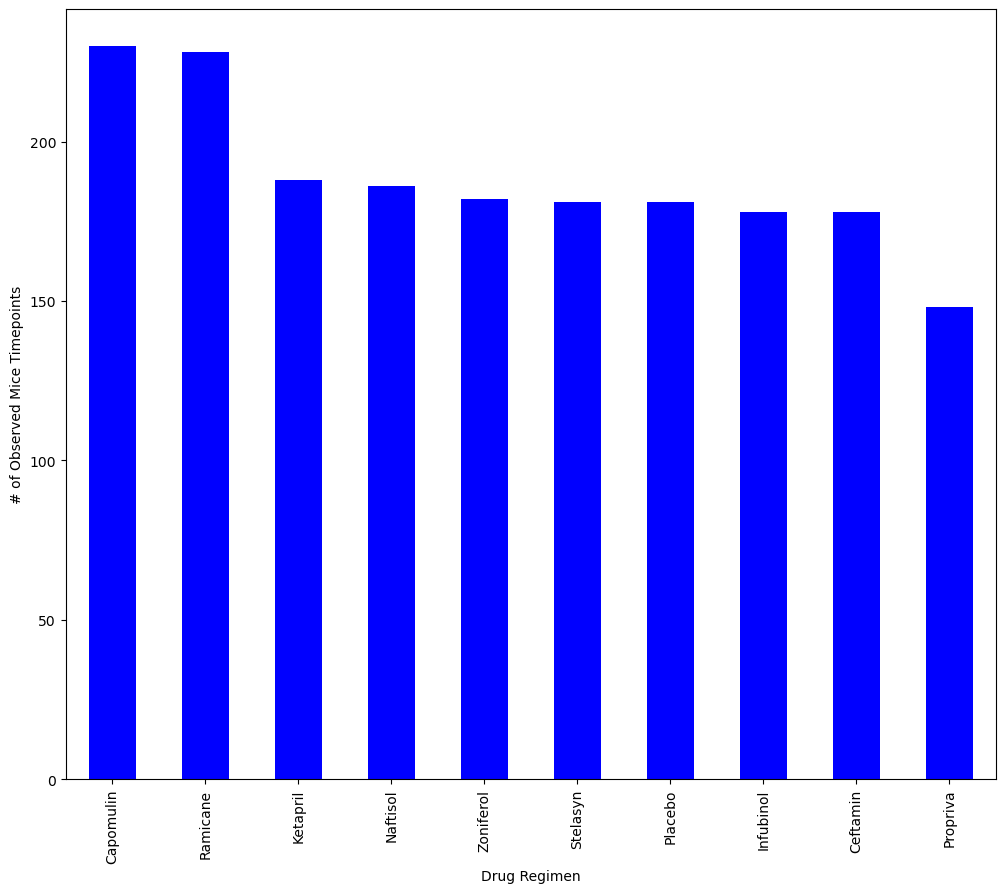

In [199]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = df['Drug Regimen'].value_counts()
drug_regimen_counts.plot(kind='bar', figsize=(12, 10), color='blue', edgecolor='none')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mice Timepoints')
plt.xticks(rotation=90)
plt.show()

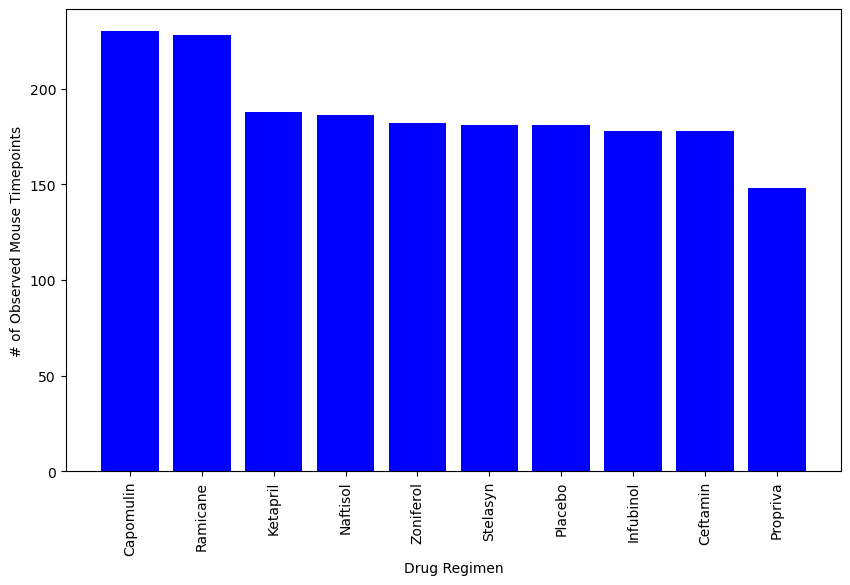

In [200]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = df['Drug Regimen'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color='blue', edgecolor='none')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

In [201]:
grp = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].count()
grp

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64

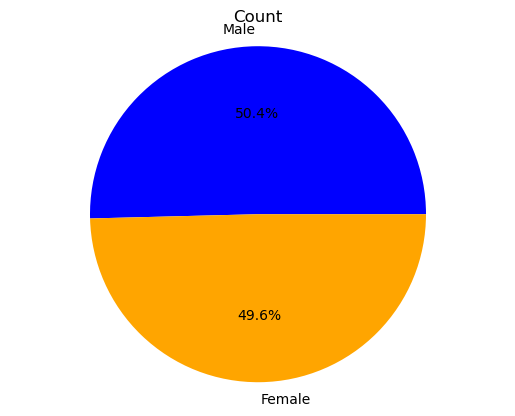

In [202]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
um =df[['Mouse ID', 'Sex']].drop_duplicates()
sex_counts = um['Sex'].value_counts()
#Plot graph
sex_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Count') 
plt.ylabel('')
plt.axis('equal')
plt.show()  

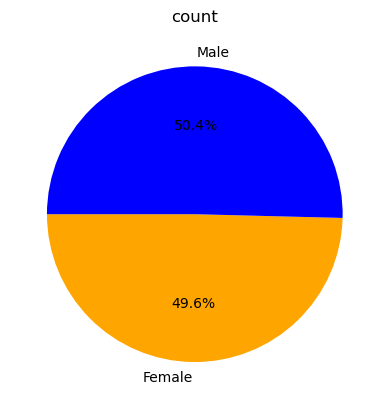

In [203]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
um = df[['Mouse ID', 'Sex']].drop_duplicates()

# Get the unique mice with their gender
female_count = um[um['Sex'] == 'Female'].shape[0]
male_count = um[um['Sex'] == 'Male'].shape[0]
# Make the pie chart
sizes = [female_count, male_count]
labels = ['Female', 'Male']
colors = ['orange', 'blue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)
plt.title('count')

plt.show()

## Quartiles, Outliers and Boxplots

In [204]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxTime_df = df.groupby('Mouse ID')[['Timepoint']].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Will be merging Max Timepoint per mouse id to 
finalTumor = maxTime_df.merge(df, on=['Mouse ID', 'Timepoint'])
finalTumor.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [205]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = df[df['Drug Regimen'] == treatment]
    
    # Get the last (maximum) timepoint for each mouse
    last_timepoint = subset.groupby('Mouse ID')['Timepoint'].max()
    
    # Merge this back to get the tumor volume at the last timepoint
    final_tumor_volumes = subset.merge(last_timepoint, on=['Mouse ID', 'Timepoint'])['Tumor Volume (mm3)']
    
    # Add to the list for plotting
    tumor_vol_data.append(final_tumor_volumes)
    
    # Calculate quartiles and IQR
    quartiles = final_tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq, median, upperq = quartiles[0.25], quartiles[0.5], quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Determine outliers
    outliers = final_tumor_volumes[(final_tumor_volumes < lower_bound) | (final_tumor_volumes > upper_bound)]
    
    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 0    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


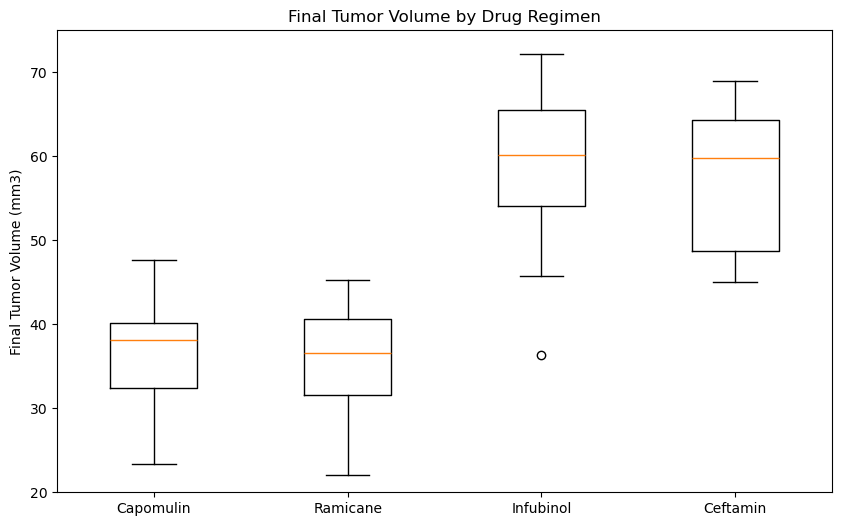

In [206]:
# Create a box plot
plt.figure(figsize=(10, 6))
box_plot = plt.boxplot(tumor_vol_data, labels=treatments)

plt.title('Final Tumor Volume by Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.ylim(20, 75)

plt.show()

## Line and Scatter Plots

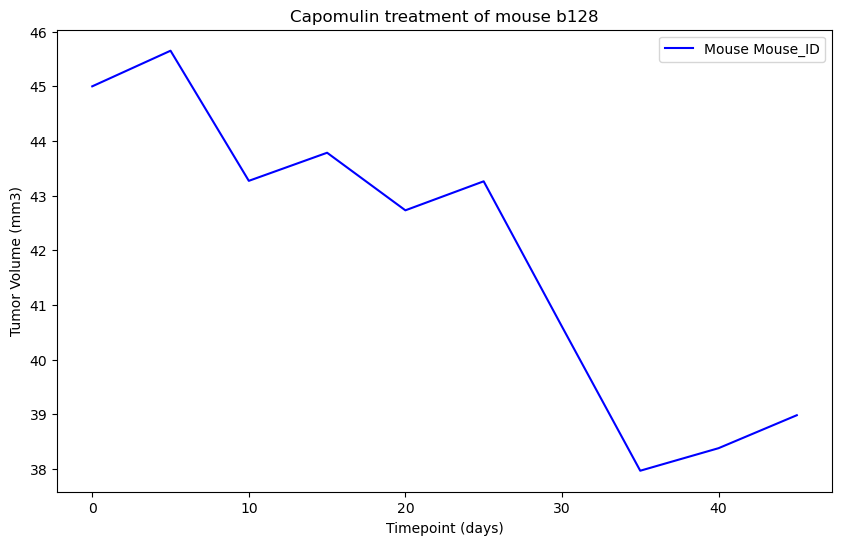

In [207]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Mouse_ID = ('b128')
capomulin_data = df.loc[(df['Drug Regimen']=='Capomulin') & (df['Mouse ID'] == 'b128'),:]
capomulin_data
plt.figure(figsize=(10,6))
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], color='b', label=f'Mouse {'Mouse_ID'}')
plt.title(f'Capomulin treatment of mouse b128')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()
plt.show()

In [208]:
#Find each data needed to groupby
df.loc[(df['Drug Regimen']=='Capomulin')]
df['Weight (g)']
df['Tumor Volume (mm3)'].mean()

50.43529323225532

In [209]:
#grouping the data by mouse id and weight for each in capomulin
mouse_weight_vol = df.loc[(df['Drug Regimen']=='Capomulin')].groupby('Mouse ID')[['Weight (g)','Tumor Volume (mm3)']].mean()
mouse_weight_vol

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344
i557,24.0,44.805810
i738,20.0,39.141053
j119,23.0,44.465236
j246,21.0,43.216925


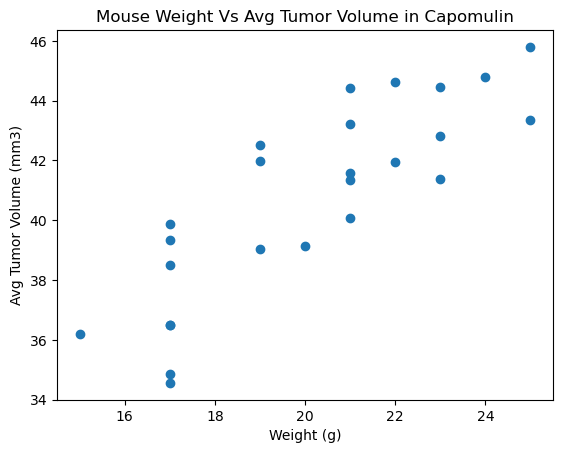

In [210]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(mouse_weight_vol['Weight (g)'], mouse_weight_vol['Tumor Volume (mm3)'])
plt.title('Mouse Weight Vs Avg Tumor Volume in Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


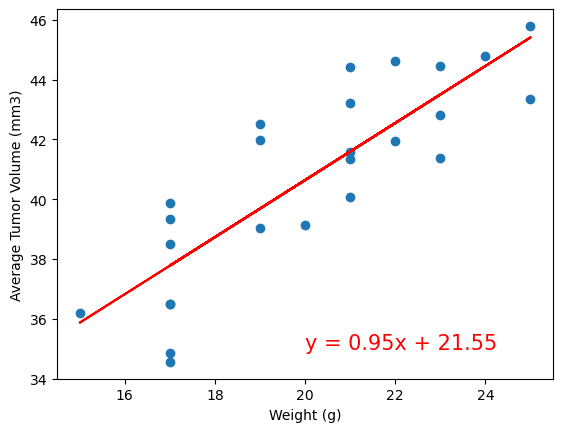

In [211]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = mouse_weight_vol['Weight (g)']
y_values = mouse_weight_vol['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20, 35), fontsize=15, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is 0.84")
plt.show()

